In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def logpdf_GAU_ND_1sample(x,mu,C):
    M = x.shape[0] # num of features of sample x
    mu = mu.reshape(M,1) # mean of the sample
    xc = x - mu # x centered
    invC = np.linalg.inv(C)
    _,log_abs_detC = np.linalg.slogdet(C)
    return -M/2 * np.log(2*np.pi) - 1/2 * log_abs_detC - 1/2 * np.dot(np.dot(xc.T,invC),xc)

In [4]:
def logpdf_GAU_ND(x,mu,C):
    M = x.shape[0] # num of features
    N = x.shape[1] # num of samples
    y = np.zeros(N) # array of N scalar elements
    for i in range(N):
        density_xi = logpdf_GAU_ND_1sample(x[:,i:i+1],mu,C)
        y[i] = density_xi
    return y

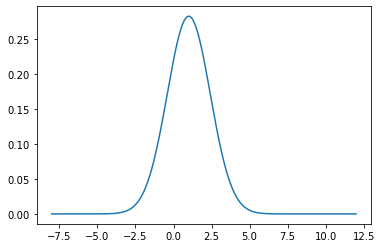

In [5]:
plt.figure()
XPlot = np.linspace(-8, 12, 1000).reshape(1,-1) # N=1000 samples of M=1 features -> it is a row vector
mu = np.ones((1,1)) * 1.0
C = np.ones((1,1)) * 2.0
y = logpdf_GAU_ND(XPlot,mu,C)
plt.plot(XPlot.ravel(), np.exp(y))
plt.show()

In [6]:
XND = np.load('Solutions/XND.npy')
mu = np.load('Solutions/muND.npy')
C = np.load('Solutions/CND.npy')
pdfSol = np.load('Solutions/llND.npy')
pdfGau = logpdf_GAU_ND(XND, mu, C)
print(np.abs(pdfSol - pdfGau).max())

0.0


In [8]:
XND.shape

(2, 100)

In [48]:
M = XND.shape[0]
N = XND.shape[1]
# compute mu_ML
mu_ML = np.mean(XND, axis=1).reshape(-1,1)

In [49]:
# compute sigma_ML
XNDc = XND - mu_ML
sigma_ML = 1/N * np.dot(XNDc,XNDc.T)

In [50]:
def loglikelihood(XND, m_ML, C_ML):
    return sum(logpdf_GAU_ND(XND,m_ML,C_ML))

In [51]:
loglikelihood(XND,mu_ML,sigma_ML)

-270.7047802379504

In [52]:
X1D = np.load('Solutions/X1d.npy')

In [61]:
mu_ML = np.mean(X1D, axis=1).reshape(-1,1)
X1Dc = X1D - mu_ML
N = X1D.shape[1]
sigma_ML = 1/N * np.dot(X1Dc,X1Dc.T)

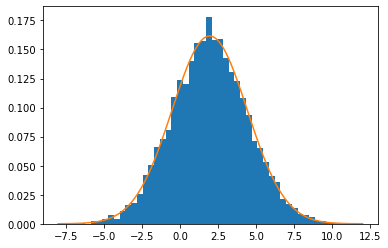

In [63]:
plt.figure()
plt.hist(X1D.ravel(), bins=50, density=True)
XPlot = np.linspace(-8, 12, 1000).reshape(1,-1)
plt.plot(XPlot.ravel(), np.exp(logpdf_GAU_ND(XPlot, mu_ML, sigma_ML)))